In [25]:
import os
import zipfile
import librosa
import librosa.display
import librosa.display
import numpy as np
from matplotlib import pyplot as plt

import utils_lib

plt.rcParams['figure.figsize'] = (17, 5)

def read_data():
    with zipfile.ZipFile('data_mp3.zip', 'r') as zip_ref:
        zip_ref.extractall('data_mp3')
    filenames = zip_ref.namelist()
    filenames = filenames[:5]
    data = []
    sampling_rate = []
    for filename in filenames:
        print("Reading file: " + filename)
        if filename.endswith('.mp3'):
            data_n, sampling_rate_n = librosa.load(filename, duration=10)
            data.append(data_n)
            sampling_rate.append(sampling_rate_n)
    return data, sampling_rate


data, sampling_rate = read_data()

Reading file: data_mp3/
Reading file: data_mp3/000/
Reading file: data_mp3/000/000002.mp3
Reading file: data_mp3/000/000005.mp3
Reading file: data_mp3/000/000010.mp3


# DATA VISUALIZATION

<Figure size 1200x400 with 0 Axes>

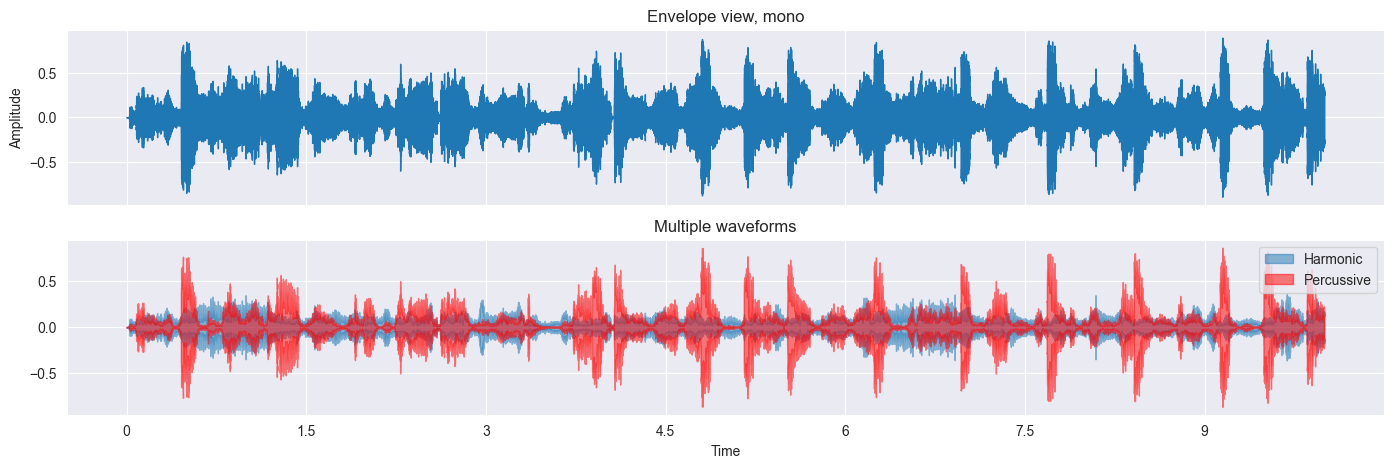

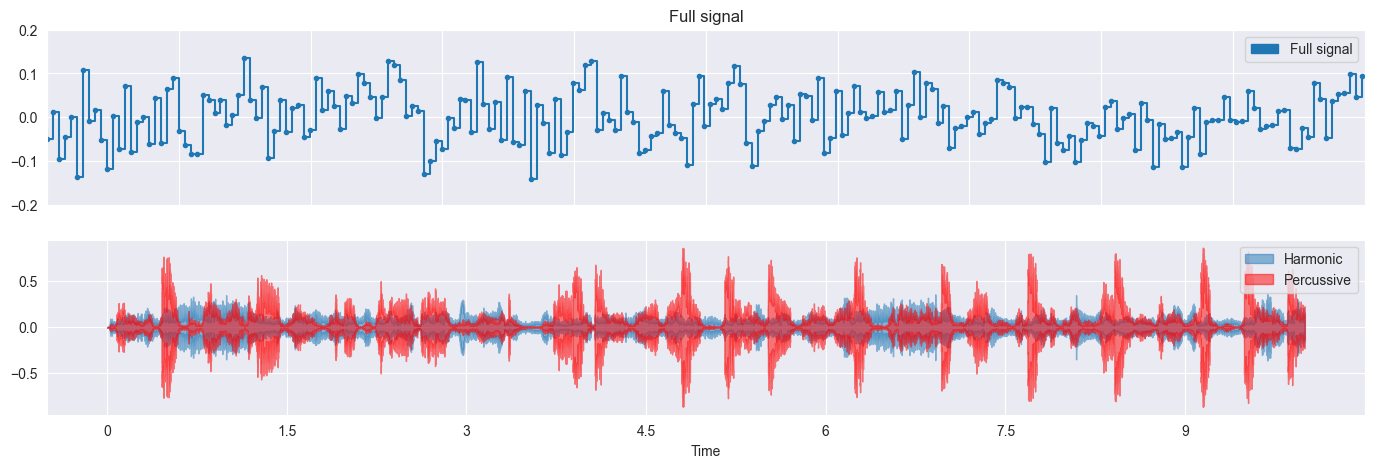

In [2]:
# TODO: DODAĆ DLA RÓŻNYCH KLAS
def plot_signal(y, sr):
    plt.figure(figsize=(12, 4))
    fig, ax = plt.subplots(nrows=2, sharex=True)
    librosa.display.waveshow(np.array(y), sr=sr, ax=ax[0])
    ax[0].set(title='Envelope view, mono')
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Amplitude")
    ax[0].label_outer()
    y_harm, y_perc = librosa.effects.hpss(y)
    librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[1], label='Harmonic')
    librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[1], label='Percussive')
    ax[1].set(title='Multiple waveforms')
    ax[1].legend()


    fig, (ax, ax2) = plt.subplots(nrows=2)
    ax.set(xlim=[6.0, 6.01], title='Full signal', ylim=[-0.2, 0.2])
    librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
    librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
    librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
    ax.label_outer()
    ax.legend()
    ax2.legend()

plot_signal(data[0], sampling_rate[0])

TODO: wniosek - czy gołym okiem widać różnice w klasach?

### HISTOGRAM ROZKŁADU KLAS

In [4]:
tracks = utils_lib.load('data/tracks.csv')
features = utils_lib.load('data/features.csv')
np.testing.assert_array_equal(features.index, tracks.index)

tracks.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [26]:
small = tracks[tracks['set', 'subset'] <= 'small']
print(small.shape)
small.head(10)

(8000, 52)


album                                                           \
         comments        date_created date_released engineer favorites  id   
track_id                                                                     
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4   1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4   1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4   6   
140             1 2008-11-26 01:49:59    2007-05-22      NaN         1  61   
141             0 2008-11-26 01:49:57    2009-01-16      NaN         1  60   
148             0 2008-11-26 01:50:19    2009-01-15      NaN         0  66   
182             0 2008-11-26 01:52:18    2005-04-26      NaN         0  80   
190             0 2008-11-26 01:52:31    2009-01-07      NaN         0  84   
193             0 2008-11-26 01:52:31    2009-01-07      NaN         0  84   
194             0 2008-11-26 01:52:31    2009-01-07      NaN         0  84   

                                                                     \
                                                information listens   
track_id                                                              
2                                                   <p></p>    6073   
5                                                   <p></p>    6073   
10                                                      NaN   47632   
140       <p>Alec K. Redfearn &amp; The Eyesores: Ellen ...    1300   
141       <p>A full ensamble of strings, drums, electron...    1304   
148       <p>"Compositions for electronics and voice." I...    1831   
182       <p><em>Worn Copy</em> is    the history of pop...    5289   
190       <p><em>Blue Piano</em> is an unreleased collec...   12333   
193       <p><em>Blue Piano</em> is an unreleased collec...   12333   
194       <p><em>Blue Piano</em> is an unreleased collec...   12333   

                                               ...       track           \
                                producer tags  ... information interest   
track_id                                       ...                        
2                                    NaN   []  ...         NaN     4656   
5                                    NaN   []  ...         NaN     1933   
10                                   NaN   []  ...         NaN    54881   
140       Alec K. Refearn, Rob Pemberton   []  ...         NaN     1593   
141                                  NaN   []  ...         NaN      839   
148                                  NaN   []  ...         NaN     2437   
182                                  NaN   []  ...         NaN     5990   
190                                  NaN   []  ...         NaN     1758   
193                                  NaN   []  ...         NaN     1679   
194                                  NaN   []  ...         NaN     1780   

                                                                           \
         language_code                                            license   
track_id                                                                    
2                   en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
5                   en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
10                  en  Attribution-NonCommercial-NoDerivatives (aka M...   
140                 en  Attribution-Noncommercial-No Derivative Works ...   
141                 en  Attribution-Noncommercial-No Derivative Works ...   
148                 en  Attribution-Noncommercial-Share Alike 3.0 Unit...   
182                 en  Attribution-Noncommercial-No Derivative Works ...   
190                 en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
193                 en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
194                 en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   

                                                                        
         listens lyric

Text(0, 0.5, 'Number of tracks')

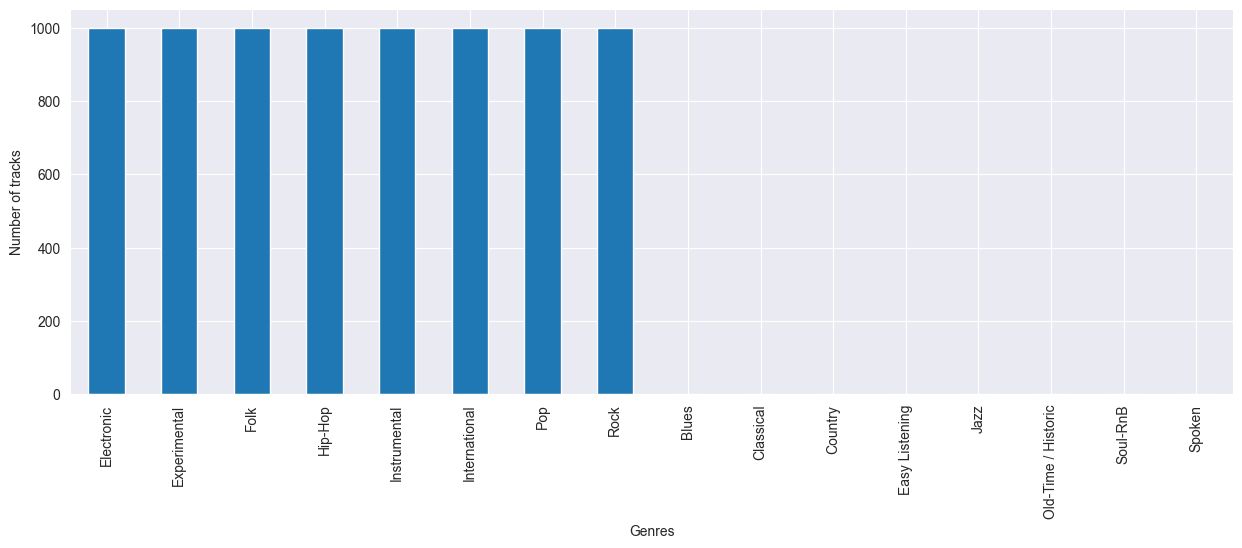

In [19]:
small['track', 'genre_top'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.xlabel('Genres')
plt.ylabel('Number of tracks')


In [23]:
# Add measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


def acc(y_test, y_pred):
    return accuracy_score(y_test, y_pred)


# Add Confusion Matrix
def conf_mat(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)


# Add F1 Score
def f1(y_test, y_pred):
    return classification_report(y_test, y_pred)


# PODZIAŁ NA ZBIÓR TESTOWY I TRENINGOWY

In [20]:
small = tracks['set', 'subset'] <= 'small'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]
X_train = features.loc[small & train, 'mfcc']
X_test = features.loc[small & test, 'mfcc']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

6400 training examples, 800 testing examples
140 features, 8 classes
